In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import cv2
from math import ceil

/opt/conda/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def show_mask(mask, ax, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        color = np.array([30/255, 144/255, 255/255, 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)
    
def show_points(coords, labels, ax, marker_size=10):
    pos_points = coords[labels==1]
    neg_points = coords[labels==0]
    ax.scatter(pos_points[:, 0], pos_points[:, 1], color='green', marker='o', s=marker_size, edgecolor=None, linewidth=1.25)
    ax.scatter(neg_points[:, 0], neg_points[:, 1], color='red', marker='o', s=marker_size, edgecolor=None, linewidth=1.25)   
    
def show_box(box, ax):
    x0, y0 = box[0], box[1]
    w, h = box[2] - box[0], box[3] - box[1]
    ax.add_patch(plt.Rectangle((x0, y0), w, h, edgecolor='green', facecolor=(0,0,0,0), lw=2)) 

In [3]:
image = cv2.imread('truck.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

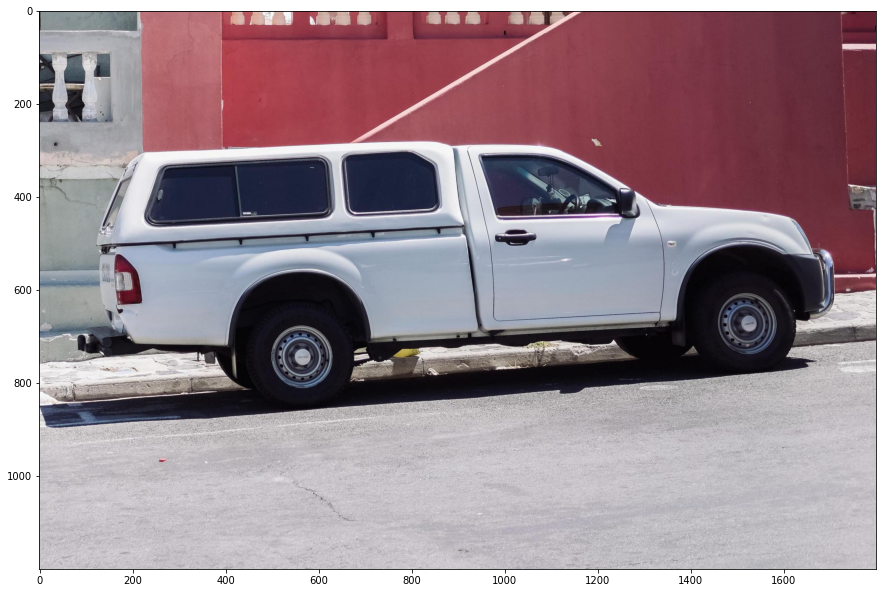

In [4]:
plt.figure(figsize=(15,15))
plt.imshow(image)
# plt.axis('off')
plt.show()

In [5]:
from segment_anything import sam_model_registry, SamPredictor

#CHANGE TO YOUR MODEL LOCATION
sam_checkpoint = "/workspace/jupyter/models/sam_vit_h_4b8939.pth"
model_type = "vit_h"

#Comment lines to run on CPU
device = "cuda"
sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)

predictor = SamPredictor(sam)

In [6]:
predictor.set_image(image)

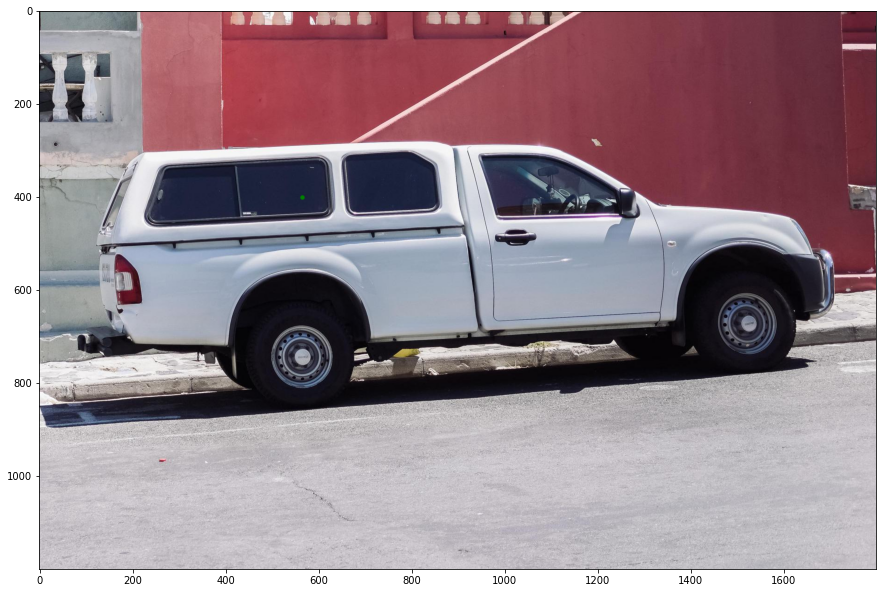

In [7]:
input_point = np.array([[565, 400]])
input_label = np.array([1])
plt.figure(figsize=(15,15))
plt.imshow(image)
show_points(input_point, input_label, plt.gca())
plt.axis('on')
plt.show()  

In [8]:
masks, scores, logits = predictor.predict(
    point_coords=input_point,
    point_labels=input_label,
    multimask_output=True,
)

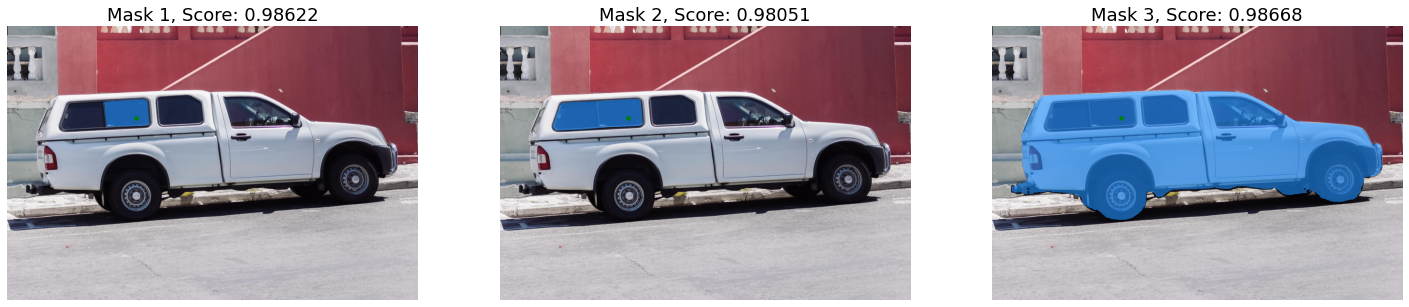

In [9]:
plt.figure(figsize=(25,15))
for i, (mask, score) in enumerate(zip(masks, scores)):
    plt.subplot(1,3,i+1)
    plt.imshow(image)
    show_mask(mask, plt.gca())
    show_points(input_point, input_label, plt.gca())
    plt.title(f"Mask {i+1}, Score: {score:.5f}", fontsize=18)
    plt.axis('off')
# plt.savefig('truckMult.png')
plt.show()  

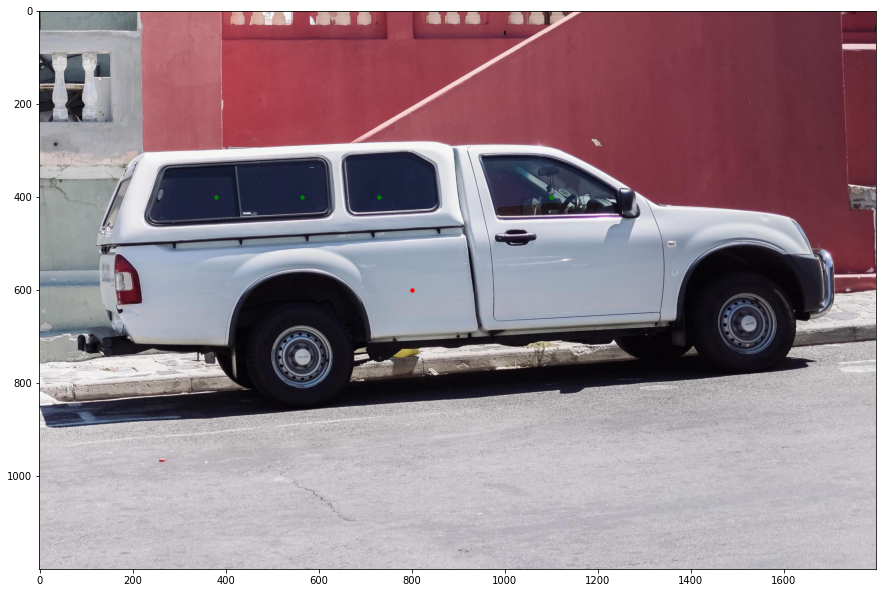

In [10]:
input_point = np.array([[565, 400], [800, 600], [380,400], [730,400], [1100,400]])
input_label = np.array([1,0,1,1,1])
plt.figure(figsize=(15,15))
plt.imshow(image)
show_points(input_point, input_label, plt.gca())
plt.axis('on')
plt.show() 

In [11]:
# mask_input = logits[np.argmax(scores), :, :]  # Choose the model's best mask || TG- Or just dont use a ambiguous prompt
masks, _, _ = predictor.predict(
    point_coords=input_point,
    point_labels=input_label,
    # mask_input=mask_input[None, :, :],
    multimask_output=False,
)

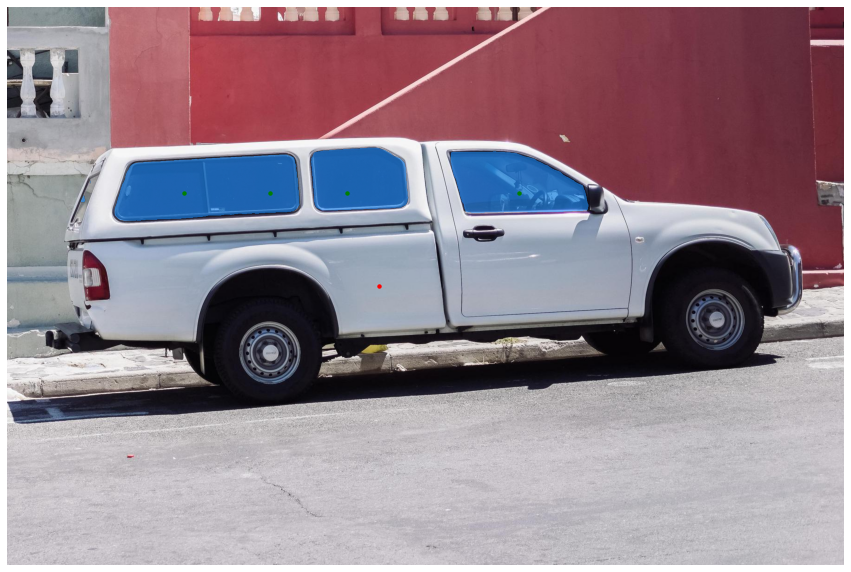

In [12]:
plt.figure(figsize=(15, 15))
plt.imshow(image)
show_mask(masks, plt.gca())
show_points(input_point, input_label, plt.gca())
plt.axis('off')
plt.show() 

In [13]:
#xyxy format
#cat
input_box = np.array([450, 475, 800, 885])
input_point = np.array([[480,700], [740,550]])
input_label = np.array([0,0])

#truck
input_box = np.array([425, 600, 700, 875])
input_point = np.array([[575, 750]])
input_label = np.array([0])

In [14]:
masks, _, _ = predictor.predict(
    point_coords=input_point,
    point_labels=input_label,
    box=input_box[None, :],
    multimask_output=False,
)

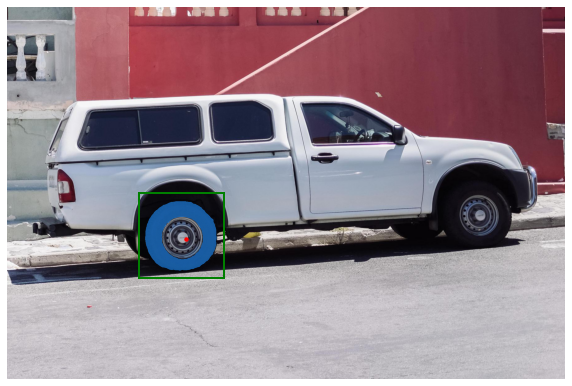

In [15]:
plt.figure(figsize=(10, 10))
plt.imshow(image)
show_mask(masks[0], plt.gca())
show_box(input_box, plt.gca())
show_points(input_point, input_label, plt.gca())
plt.axis('off')
plt.show()